## Holiday effects and final forecast

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.graphics import tsaplots
from statsmodels.graphics import tsaplots
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
%matplotlib inline

#### 1. Plot a your predicted energy usage as well as the actual energy usage for December 25, 2019. How do you feel your forecast did?

In [122]:
train = pd.read_csv('train.csv',parse_dates = ["DATE"])
train.set_index('DATE',inplace=True)

In [123]:
train.head()

,mw,HourlyDryBulbTemperature,Hour,Weekday,Month,Year,QuadraticTemp,resid,fitted,fitted_resid,fitted_ESM,APE_ESM
DATE,,,,,,,,,,,,
2017-02-01 00:53:00,1419.881,-0.870387,0,2,2,2017,-0.956635,79.515309,1340.365691,33.687513,1374.053204,3.227580
2017-02-01 01:53:00,1379.505,-0.870387,1,2,2,2017,-0.956635,68.294312,1311.210688,74.543015,1385.753704,0.452967
2017-02-01 02:53:00,1366.106,-0.923378,2,2,2,2017,-0.994560,53.192221,1312.913779,70.519750,1383.433529,1.268388
2017-02-01 03:53:00,1364.453,-0.923378,3,2,2,2017,-0.994560,42.706762,1321.746238,57.808332,1379.554570,1.106786
2017-02-01 04:53:00,1391.265,-0.923378,4,2,2,2017,-0.994560,23.080630,1368.184370,50.443115,1418.627485,1.966734


In [124]:
test = pd.read_csv('test.csv',parse_dates = ["DATE"])
test.set_index('DATE',inplace=True)

In [125]:
test.head()

,mw,HourlyDryBulbTemperature,Hour,Weekday,Month,Year,QuadraticTemp,pred,pred_resid,pred_ESM,APE_ESM
DATE,,,,,,,,,,,
2020-01-01 00:53:00,1363.428,-0.435454,0,2,1,2020,-0.506710,1324.425261,-81.806992,1242.618269,8.860734
2020-01-01 01:53:00,1335.975,-0.627840,1,2,1,2020,-0.655346,1318.492611,-81.610303,1236.882308,7.417256
2020-01-01 02:53:00,1296.817,-0.531647,2,2,1,2020,-0.582267,1300.675062,-83.818069,1216.856992,6.165867
2020-01-01 03:53:00,1288.403,-0.531647,3,2,1,2020,-0.582267,1311.787092,-87.893329,1223.893763,5.006915
2020-01-01 04:53:00,1292.263,-0.435454,4,2,1,2020,-0.506710,1352.877926,-92.588764,1260.289161,2.474252


<AxesSubplot:xlabel='DATE'>

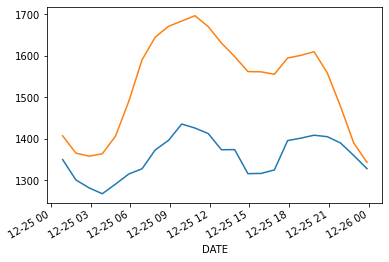

In [126]:
train['2019-12-25 00:00:00' : '2019-12-25 23:59:59']['mw'].plot()
train['2019-12-25 00:00:00' : '2019-12-25 23:59:59']['fitted'].plot()

### Create a holiday variable in your training and test set that flags US Federal holidays.

In [127]:
from pandas.tseries.holiday import USFederalHolidayCalendar

In [128]:
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=train.index.min(), end=train.index.max())

dt_holiday = [ ]
for idx,row in train.iterrows():
    cur_dt =  idx
    cur_dt = cur_dt.replace( hour=0, minute=0, second=0 )
    dt_holiday.append( cur_dt in holidays )

In [129]:
train['Holiday']= dt_holiday

In [130]:
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=test.index.min(), end=test.index.max())

dt_holiday_test = [ ]
for idx,row in test.iterrows():
    cur_dt =  idx
    cur_dt = cur_dt.replace( hour=0, minute=0, second=0 )
    dt_holiday_test.append( cur_dt in holidays )

In [131]:
test['Holiday']= dt_holiday_test

In [132]:
train.Holiday.sum()

696

In [133]:
test.Holiday.sum()

24

In [134]:
696 + 24

720

In [135]:
train.head()

,mw,HourlyDryBulbTemperature,Hour,Weekday,Month,Year,QuadraticTemp,resid,fitted,fitted_resid,fitted_ESM,APE_ESM,Holiday
DATE,,,,,,,,,,,,,
2017-02-01 00:53:00,1419.881,-0.870387,0,2,2,2017,-0.956635,79.515309,1340.365691,33.687513,1374.053204,3.227580,False
2017-02-01 01:53:00,1379.505,-0.870387,1,2,2,2017,-0.956635,68.294312,1311.210688,74.543015,1385.753704,0.452967,False
2017-02-01 02:53:00,1366.106,-0.923378,2,2,2,2017,-0.994560,53.192221,1312.913779,70.519750,1383.433529,1.268388,False
2017-02-01 03:53:00,1364.453,-0.923378,3,2,2,2017,-0.994560,42.706762,1321.746238,57.808332,1379.554570,1.106786,False
2017-02-01 04:53:00,1391.265,-0.923378,4,2,2,2017,-0.994560,23.080630,1368.184370,50.443115,1418.627485,1.966734,False


### Repeat the process of the previous sections by creating a linear regression model but with this new holiday variable added in as an additional predictor.

In [136]:
model_h = sm.OLS.from_formula('''mw ~ 
HourlyDryBulbTemperature*C(Month)+
QuadraticTemp*C(Month)+
HourlyDryBulbTemperature*C(Hour)+
QuadraticTemp*C(Hour) + C(Weekday)*C(Hour) + C(Holiday)* C(Weekday)
''', data=train).fit()

In [137]:
model_h.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     mw   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1273.
Date:                Sat, 03 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:09:09   Log-Likelihood:            -1.4741e+05
No. Observations:               25560   AIC:                         2.953e+05
Df Residuals:                   25306   BIC:                         2.974e+05
Df Model:                         253                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                1296.6677     10.445    124.142      0.000    1276.195    1317.141
C(Month)[T.2]                             -15.6423      9.068     -1.725      0.085     -33.417       2.132
C(Month)[T.3]                             -52.0535      9.173     -5.675      0.000     -70.033     -34.074
C(Month)[T.4]                             -36.7771      8.633     -4.260      0.000     -53.699     -19.855
C(Month)[T.5]                              49.5425     10.167      4.873      0.000      29.615      69.470
C(Month)[T.6]                             146.4344     14.289     10.248      0.000     118.427     174.442
C(Month)[T.7]                             125.3947     24.350      5.150      0.000      77.668     173.122
C(Month)[T.8]                             190.1948     20.650      9.210      0.000     149.720     230.670
C(Month)[T.9]                             165.3673     12.720     13.000      0.000     140.435     190.300
C(Month)[T.10]                            103.1634      8.825     11.690      0.000      85.866     120.461
C(Month)[T.11]                            -53.5694     10.312     -5.195      0.000     -73.782     -33.357
C(Month)[T.12]                            -44.4810     10.757     -4.135      0.000     -65.565     -23.397
C(Hour)[T.1]                              -28.2385      9.041     -3.123      0.002     -45.960     -10.517
C(Hour)[T.2]                              -32.0484      9.061     -3.537      0.000     -49.808     -14.289
C(Hour)[T.3]                              -15.4302      9.077     -1.700      0.089     -33.222       2.362
C(Hour)[T.4]                               40.0282      9.091      4.403      0.000      22.208      57.848
C(Hour)[T.5]                              122.8347      9.090     13.513      0.000     105.018     140.652
C(Hour)[T.6]                              187.9133      9.045     20.776      0.000     170.185     205.641
C(Hour)[T.7]                              229.6269      9.000     25.515      0.000     211.987     247.267
C(Hour)[T.8]                              256.0207      8.982     28.503      0.000     238.415     273.627
C(Hour)[T.9]                              274.7019      8.985     30.573      0.000     257.090     292.314
C(Hour)[T.10]                             286.9392      8.998     31.888      0.000     269.302     304.576
C(Hour)[T.11]                             293.7814      9.012     32.598      0.000     276.117     311.446
C(Hour)[T.12]                             302.9606      9.021     33.583      0.000     285.278     320.643
C(Hour)[T.13]                             293.1130      9.034     32.446      0.000     275.406     310.820
C(Hour)[T.14]                             288.1262      9.0

After building your linear regression, continue by adding in a dynamic time component to your model with your exponential smoothing, seasonal ARIMA, and ensemble approaches

In [138]:
train['fitted_h'] = model_h.fittedvalues
test['pred_h'] = model_h.predict(test)

train['resid_h'] = model_h.resid

### Recreate the plot in this first step of this milestone but add a third line - your new forecasted energy usage for December 25, 2019 from your final holiday effects model.

<AxesSubplot:xlabel='DATE'>

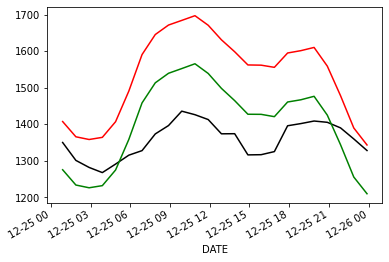

In [139]:
train['2019-12-25 00:00:00' : '2019-12-25 23:59:59']['mw'].plot(c='black')
train['2019-12-25 00:00:00' : '2019-12-25 23:59:59']['fitted'].plot(c='red')
train['2019-12-25 00:00:00' : '2019-12-25 23:59:59']['fitted_h'].plot(c='green')

## Based on all the training data MAPE values you have seen as you have been building models, choose a final model.

In [140]:
mod_sar = SARIMAX(train['resid_h'], order=(2,0,0), seasonal_order=(0,1,1,24))
mod_sar = mod_sar.fit()

print(mod_sar.summary())

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                                      SARIMAX Results                                       
Dep. Variable:                              resid_h   No. Observations:                25560
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 24)   Log Likelihood             -127685.486
Date:                              Sat, 03 Apr 2021   AIC                         255378.973
Time:                                      15:10:29   BIC                         255411.564
Sample:                                           0   HQIC                        255389.511
                                            - 25560                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8087      0.003    266.455      0.000       0.803       0.815
ar.L2          0.07

In [141]:
train.head()

,mw,HourlyDryBulbTemperature,Hour,Weekday,Month,Year,QuadraticTemp,resid,fitted,fitted_resid,fitted_ESM,APE_ESM,Holiday,fitted_h,resid_h
DATE,,,,,,,,,,,,,,,
2017-02-01 00:53:00,1419.881,-0.870387,0,2,2,2017,-0.956635,79.515309,1340.365691,33.687513,1374.053204,3.227580,False,1341.692803,78.188197
2017-02-01 01:53:00,1379.505,-0.870387,1,2,2,2017,-0.956635,68.294312,1311.210688,74.543015,1385.753704,0.452967,False,1312.412017,67.092983
2017-02-01 02:53:00,1366.106,-0.923378,2,2,2,2017,-0.994560,53.192221,1312.913779,70.519750,1383.433529,1.268388,False,1313.976297,52.129703
2017-02-01 03:53:00,1364.453,-0.923378,3,2,2,2017,-0.994560,42.706762,1321.746238,57.808332,1379.554570,1.106786,False,1322.797451,41.655549
2017-02-01 04:53:00,1391.265,-0.923378,4,2,2,2017,-0.994560,23.080630,1368.184370,50.443115,1418.627485,1.966734,False,1369.212840,22.052160


In [142]:
test.head()

,mw,HourlyDryBulbTemperature,Hour,Weekday,Month,Year,QuadraticTemp,pred,pred_resid,pred_ESM,APE_ESM,Holiday,pred_h
DATE,,,,,,,,,,,,,
2020-01-01 00:53:00,1363.428,-0.435454,0,2,1,2020,-0.506710,1324.425261,-81.806992,1242.618269,8.860734,False,1336.440923
2020-01-01 01:53:00,1335.975,-0.627840,1,2,1,2020,-0.655346,1318.492611,-81.610303,1236.882308,7.417256,False,1329.342352
2020-01-01 02:53:00,1296.817,-0.531647,2,2,1,2020,-0.582267,1300.675062,-83.818069,1216.856992,6.165867,False,1312.070964
2020-01-01 03:53:00,1288.403,-0.531647,3,2,1,2020,-0.582267,1311.787092,-87.893329,1223.893763,5.006915,False,1323.203395
2020-01-01 04:53:00,1292.263,-0.435454,4,2,1,2020,-0.506710,1352.877926,-92.588764,1260.289161,2.474252,False,1364.873586


In [143]:
forecast = pd.DataFrame(mod_sar.forecast(744))
forecast.index = test.index.copy()

train['fitted_arimax_resid_h'] = mod_sar.predict()
test['pred_resid2_h'] = forecast

train['fitted_ARIMA_h'] = train['fitted_h'] + train['fitted_arimax_resid_h']
test['pred_ARIMA_h'] = test['pred_h'] + test['pred_resid2_h']

train['APE_ARIMA_h'] = abs((train['mw']-train['fitted_ARIMA_h'])/train['mw'])*100
test['APE_ARIMA_h'] = abs((test['mw']-test['pred_ARIMA_h'])/test['mw'])*100

print("Training Naive Holiday + ARIMA Model MAPE is: ", train['APE_ARIMA_h'].mean())
print("Naive Holiday + ARIMA Model Holiday MAPE is: ", test['APE_ARIMA_h'].mean())

Training Naive Holiday + ARIMA Model MAPE is:  1.3802717049294289
Naive Holiday + ARIMA Model Holiday MAPE is:  4.456855224069335


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:xlabel='DATE'>

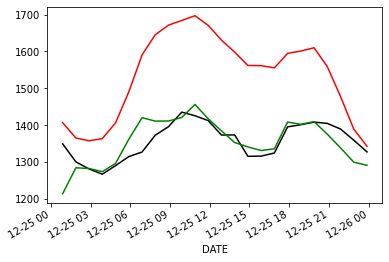

In [144]:
train['2019-12-25 00:00:00' : '2019-12-25 23:59:59']['mw'].plot(c='black')
train['2019-12-25 00:00:00' : '2019-12-25 23:59:59']['fitted'].plot(c='red')
train['2019-12-25 00:00:00' : '2019-12-25 23:59:59']['fitted_ARIMA_h'].plot(c='green')

## Now that you have your final model, refit this final model (without changing any variable or model choices) to your entire data set (training and testing combined).

In [145]:
temp = pd.read_csv('hr_temp_20170201-20200131_subset.csv')
temp = temp.rename(columns={'HourlyDryBulbTemperature': 'Temp'})
temp.DATE = pd.to_datetime(temp.DATE)
temp.set_index('DATE',inplace=True)

In [146]:
temp.head()

,STATION,REPORT_TYPE,SOURCE,Temp
DATE,,,,
2017-02-01 00:53:00,72520514762,FM-15,7,37.0
2017-02-01 01:53:00,72520514762,FM-15,7,37.0
2017-02-01 02:53:00,72520514762,FM-15,7,36.0
2017-02-01 03:53:00,72520514762,FM-15,7,36.0
2017-02-01 04:53:00,72520514762,FM-15,7,36.0


In [147]:
train.head()

,mw,HourlyDryBulbTemperature,Hour,Weekday,Month,Year,QuadraticTemp,resid,fitted,fitted_resid,fitted_ESM,APE_ESM,Holiday,fitted_h,resid_h,fitted_arimax_resid_h,fitted_ARIMA_h,APE_ARIMA_h
DATE,,,,,,,,,,,,,,,,,,
2017-02-01 00:53:00,1419.881,-0.870387,0,2,2,2017,-0.956635,79.515309,1340.365691,33.687513,1374.053204,3.227580,False,1341.692803,78.188197,0.000000,1341.692803,5.506673
2017-02-01 01:53:00,1379.505,-0.870387,1,2,2,2017,-0.956635,68.294312,1311.210688,74.543015,1385.753704,0.452967,False,1312.412017,67.092983,0.634972,1313.046988,4.817526
2017-02-01 02:53:00,1366.106,-0.923378,2,2,2,2017,-0.994560,53.192221,1312.913779,70.519750,1383.433529,1.268388,False,1313.976297,52.129703,1.095558,1315.071856,3.735738
2017-02-01 03:53:00,1364.453,-0.923378,3,2,2,2017,-0.994560,42.706762,1321.746238,57.808332,1379.554570,1.106786,False,1322.797451,41.655549,1.372376,1324.169827,2.952331
2017-02-01 04:53:00,1391.265,-0.923378,4,2,2,2017,-0.994560,23.080630,1368.184370,50.443115,1418.627485,1.966734,False,1369.212840,22.052160,1.525401,1370.738240,1.475403


In [148]:
train = train.merge(temp['Temp'],left_index=True,right_index=True,how='inner')
train.head()

,mw,HourlyDryBulbTemperature,Hour,Weekday,Month,Year,QuadraticTemp,resid,fitted,fitted_resid,fitted_ESM,APE_ESM,Holiday,fitted_h,resid_h,fitted_arimax_resid_h,fitted_ARIMA_h,APE_ARIMA_h,Temp
DATE,,,,,,,,,,,,,,,,,,,
2017-02-01 00:53:00,1419.881,-0.870387,0,2,2,2017,-0.956635,79.515309,1340.365691,33.687513,1374.053204,3.227580,False,1341.692803,78.188197,0.000000,1341.692803,5.506673,37.0
2017-02-01 01:53:00,1379.505,-0.870387,1,2,2,2017,-0.956635,68.294312,1311.210688,74.543015,1385.753704,0.452967,False,1312.412017,67.092983,0.634972,1313.046988,4.817526,37.0
2017-02-01 02:53:00,1366.106,-0.923378,2,2,2,2017,-0.994560,53.192221,1312.913779,70.519750,1383.433529,1.268388,False,1313.976297,52.129703,1.095558,1315.071856,3.735738,36.0
2017-02-01 03:53:00,1364.453,-0.923378,3,2,2,2017,-0.994560,42.706762,1321.746238,57.808332,1379.554570,1.106786,False,1322.797451,41.655549,1.372376,1324.169827,2.952331,36.0
2017-02-01 04:53:00,1391.265,-0.923378,4,2,2,2017,-0.994560,23.080630,1368.184370,50.443115,1418.627485,1.966734,False,1369.212840,22.052160,1.525401,1370.738240,1.475403,36.0


In [149]:
weather_feb = pd.read_csv('hr_temp_20200201-20200229_subset.csv')

In [162]:
len(weather_feb)

696

In [151]:
d_feb = {'Temp': weather_feb['HourlyDryBulbTemperature'], 'Date': weather_feb['DATE']}

df_feb = pd.DataFrame(d_feb)

df_feb['Date'] = pd.to_datetime(df_feb['Date'])

df_feb['hour'] = pd.DatetimeIndex(pd.to_datetime(df_feb['Date'])).hour
df_feb['day'] = pd.DatetimeIndex(pd.to_datetime(df_feb['Date'])).day
df_feb['weekday'] = df_feb['Date'].dt.dayofweek
df_feb['month'] = pd.DatetimeIndex(pd.to_datetime(df_feb['Date'])).month
df_feb['year'] = pd.DatetimeIndex(pd.to_datetime(df_feb['Date'])).year

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=df_feb['Date'].min(), end=df_feb['Date'].max())

dt_holiday = [ ]
for idx,row in df_feb.iterrows():
    cur_dt = row[ 'Date' ]
    cur_dt = cur_dt.replace( hour=0, minute=0, second=0 )
    dt_holiday.append( cur_dt in holidays )
    
df_feb[ 'holiday' ] = dt_holiday

df_feb = df_feb.set_index('Date')

df_feb['Temp_Norm'] = (df_feb['Temp']-train['Temp'].mean())/train['Temp'].std()

df_feb['Temp_Norm2'] = df_feb['Temp_Norm']**2

df_feb.head()

,Temp,hour,day,weekday,month,year,holiday,Temp_Norm,Temp_Norm2
Date,,,,,,,,,
2020-02-01 00:51:00,32,0,1,5,2,2020,False,-1.137229,1.293289
2020-02-01 01:51:00,32,1,1,5,2,2020,False,-1.137229,1.293289
2020-02-01 02:51:00,32,2,1,5,2,2020,False,-1.137229,1.293289
2020-02-01 03:51:00,32,3,1,5,2,2020,False,-1.137229,1.293289
2020-02-01 04:51:00,31,4,1,5,2,2020,False,-1.190237,1.416664


In [155]:
weather = pd.read_csv('hr_temp_20170201-20200131_subset.csv')
energy = pd.read_csv('hrl_load_metered - 20170201-20200131.csv')
d = {'MW': energy['mw'], 'Temp': weather['HourlyDryBulbTemperature'], 'Date': weather['DATE']}
df = pd.DataFrame(d)
df['Date'] = pd.to_datetime(df['Date'])

df['hour'] = pd.DatetimeIndex(pd.to_datetime(df['Date'])).hour
df['day'] = pd.DatetimeIndex(pd.to_datetime(df['Date'])).day
df['weekday'] = df['Date'].dt.dayofweek
df['month'] = pd.DatetimeIndex(pd.to_datetime(df['Date'])).month
df['year'] = pd.DatetimeIndex(pd.to_datetime(df['Date'])).year

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=df['Date'].min(), end=df['Date'].max())

dt_holiday = [ ]
for idx,row in df.iterrows():
    cur_dt = row[ 'Date' ]
    cur_dt = cur_dt.replace( hour=0, minute=0, second=0 )
    dt_holiday.append( cur_dt in holidays )
    
df[ 'holiday' ] = dt_holiday

df = df.set_index('Date')
df['Temp'] = df['Temp'].interpolate(method='linear')
df.head()

,MW,Temp,hour,day,weekday,month,year,holiday
Date,,,,,,,,
2017-02-01 00:53:00,1419.881,37.0,0,1,2,2,2017,False
2017-02-01 01:53:00,1379.505,37.0,1,1,2,2,2017,False
2017-02-01 02:53:00,1366.106,36.0,2,1,2,2,2017,False
2017-02-01 03:53:00,1364.453,36.0,3,1,2,2,2017,False
2017-02-01 04:53:00,1391.265,36.0,4,1,2,2,2017,False


In [156]:
df_final = df

df_final['Temp_Norm'] = (df_final['Temp']-train['Temp'].mean())/train['Temp'].std()

df_final['Temp_Norm2'] = df_final['Temp_Norm']**2

In [157]:
results_final = sm.OLS.from_formula('MW ~ Temp_Norm*C(hour) + Temp_Norm2*C(hour)+ Temp_Norm*C(month) + Temp_Norm2*C(month) + C(weekday)*C(hour) + C(holiday)*C(weekday)', 
                              data=df_final).fit()
print(results_final.summary())

                            OLS Regression Results                            
Dep. Variable:                     MW   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1302.
Date:                Sat, 03 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:18:10   Log-Likelihood:            -1.5141e+05
No. Observations:               26280   AIC:                         3.033e+05
Df Residuals:                   26026   BIC:                         3.054e+05
Df Model:                         253                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [158]:
df_final['pred_final'] = results_final.fittedvalues
df_final['resid_final'] = results_final.resid

In [159]:
df_feb['pred_final'] = results_final.predict(df_feb)

In [160]:
mod = SARIMAX(df_final['resid_final'], order=(2,0,0), seasonal_order=(0,1,1,24))
res = mod.fit()

#696 len of february
forecast_ARIMA = pd.DataFrame(res.forecast(696))
forecast_ARIMA.index = df_feb.index.copy()

df_feb['forecast_ARIMA'] = forecast_ARIMA

df_feb['forecast_final'] = df_feb['pred_final'] + df_feb['forecast_ARIMA']

df_feb.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


,Temp,hour,day,weekday,month,year,holiday,Temp_Norm,Temp_Norm2,pred_final,forecast_ARIMA,forecast_final
Date,,,,,,,,,,,,
2020-02-01 00:51:00,32,0,1,5,2,2020,False,-1.137229,1.293289,1368.167570,-1.169781,1366.997789
2020-02-01 01:51:00,32,1,1,5,2,2020,False,-1.137229,1.293289,1337.947404,-6.469045,1331.478359
2020-02-01 02:51:00,32,2,1,5,2,2020,False,-1.137229,1.293289,1314.707113,-8.780642,1305.926471
2020-02-01 03:51:00,32,3,1,5,2,2020,False,-1.137229,1.293289,1309.664658,-18.866389,1290.798269
2020-02-01 04:51:00,31,4,1,5,2,2020,False,-1.190237,1.416664,1325.709320,-32.276523,1293.432797


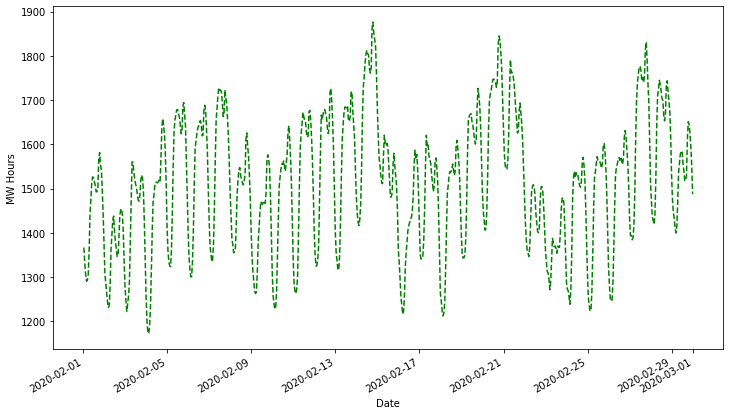

In [169]:
df_feb['forecast_final'].plot(color = 'green', linestyle = 'dashed', figsize=(12,7))

plt.ylabel('MW Hours')
plt.xlabel('Date')

plt.show()

<AxesSubplot:xlabel='DATE'>

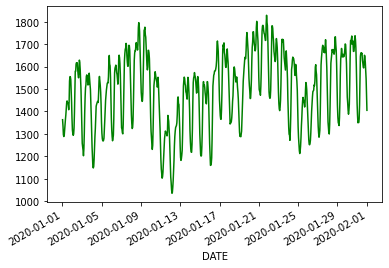

In [176]:
jan_2020 = test['2020-01-01':'2020-01-31']
jan_2020.mw.plot(color='green')

In [177]:
jan_2020.mw.describe()

count     744.000000
mean     1496.122780
std       162.977402
min      1035.505000
25%      1370.568750
50%      1515.883000
75%      1628.992750
max      1828.762000
Name: mw, dtype: float64

In [165]:
df_feb['forecast_final'].describe()

count     696.000000
mean     1513.723949
std       148.596818
min      1172.550025
25%      1400.998852
50%      1523.118036
75%      1624.741827
max      1876.291973
Name: forecast_final, dtype: float64

<AxesSubplot:>

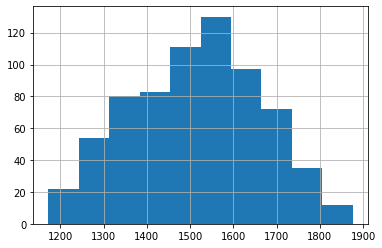

In [168]:
df_feb.forecast_final.hist()

## Summary